In [21]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('future.no_silent_downcasting', True)
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [22]:
# Step 1: Load the dataset
expenses_df = pd.read_csv("C:\\Users\\Berkay\\PycharmProjects\\MedicalCostsRegression\\data\\expenses.csv")

In [23]:
# Step 2: Display the first few rows of the dataset
print(expenses_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [24]:
# Step 3: Check the shape of the dataset
print(expenses_df.shape)

(1338, 7)


In [25]:
# Step 4: View summary statistics of the dataset
print(expenses_df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [26]:
# Step 5: One-hot encode categorical variables and convert boolean values to integers
expenses_df = pd.get_dummies(expenses_df, columns=['sex', 'smoker', 'region'], drop_first=True)
expenses_df = expenses_df.replace({True: 1, False: 0})

In [27]:
# Step 6: Display the transformed dataset
expenses_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [28]:
# Step 7: Apply a log transformation to 'charges' for normalization
expenses_df['charges_log'] = np.log(expenses_df['charges'])

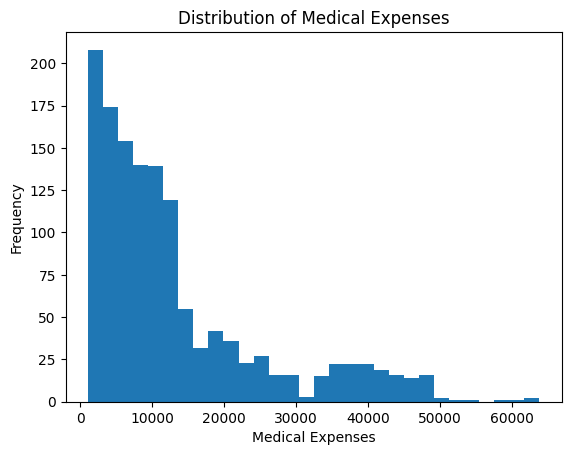

In [29]:
# Step 8: Plot the distribution of original medical expenses
plt.hist(expenses_df['charges'], bins=30)
plt.xlabel('Medical Expenses')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Expenses')
plt.show()

In [30]:
# Step 9: Define feature set (X) and target variable (y)
X = expenses_df.drop(['charges', 'charges_log'], axis=1) 
y = expenses_df['charges_log'] 

In [31]:
# Step 10: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Step 11: Scale the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Step 12: Generate polynomial features to enhance model complexity
poly_model = PolynomialFeatures(degree=2) 
X_train_poly = poly_model.fit_transform(X_train)
X_test_poly = poly_model.transform(X_test)  

In [34]:
# Step 13: Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [35]:
# Step 14: Train the model on the training data
reg_model = rf_regressor.fit(X_train, y_train)

In [36]:
# Step 15: Make predictions on the test data
y_pred = reg_model.predict(X_test)

In [37]:
# Step 16: Evaluate model performance with R-squared score
print("Random Forest Regression Model Performance (R-squared):", reg_model.score(X_test, y_test))

Random Forest Regression Model Performance (R-squared): 0.8466674160767298


In [38]:
# Step 17: Display feature importances
importances = reg_model.feature_importances_
feature_names = X.columns

In [39]:
indices = np.argsort(importances)[::-1]
print("Feature Importances:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature Importances:
1. smoker_yes (0.436814)
2. age (0.380505)
3. bmi (0.105306)
4. children (0.041902)
5. sex_male (0.012146)
6. region_southeast (0.008910)
7. region_northwest (0.007591)
8. region_southwest (0.006825)


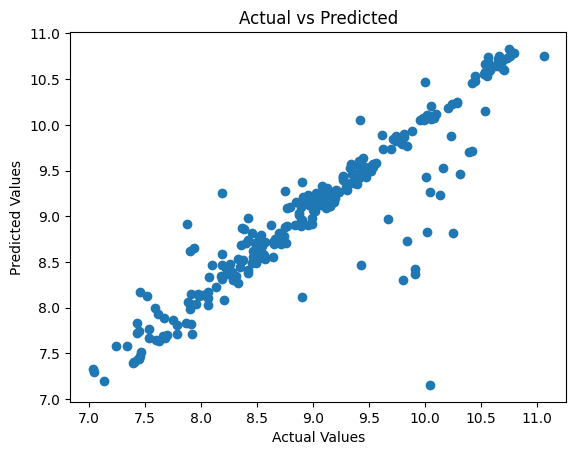

In [40]:
# Step 18: Plot actual vs. predicted values for visual evaluation
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()